In [2]:
import pandas as pd
import keras
import numpy as np
import pydot
import seaborn as sns

Using TensorFlow backend.


## 1. Defining a Keras Model

### 1.1 Single Input

The first step in creating a neural network model is to define the Input layer. This layer takes in raw data, usually in the form of numpy arrays. The shape of the Input layer defines how many variables your neural network will use. For example, if the input data has 10 columns, you define an Input layer with a shape of (10,).

In [ ]:
input_tensor = keras.Input(shape=(1,0))
print(input_tensor)

### 1.2 Single Output

Once you have an Input layer, the next step is to add a Dense layer.

Dense layers learn a weight matrix, where the first dimension of the matrix is the dimension of the input data, and the second dimension is the dimension of the output data. Recall that your Input layer has a shape of 1. In this case, your output layer will also have a shape of 1. This means that the Dense layer will learn a 1x1 weight matrix.

In [ ]:
output_layer = keras.layers.Dense(1)
print(output_layer)

#### Note that layers are functions and not tensors. Layers are used to construct a deep learning model and tensors are used to define the dataflow trought the model.

### 1.3 Connecting inputs to outputs

Output layers are simply Dense layers! Output layers are used to reduce the dimension of the inputs to the dimension of the outputs. You'll learn more about output dimensions in chapter 4, but for now, you'll always use a single output in your neural networks, which is equivalent to Dense(1) or a dense layer with a single unit.

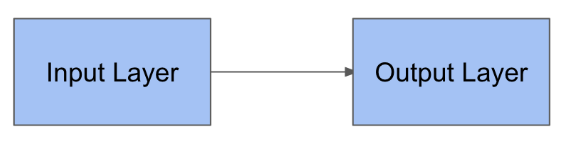

In [ ]:
from keras.layers import Input, Dense
input_tensor = Input(shape=(1,))
output_layer = Dense(1)
output_tensor = output_layer(input_tensor)
print(output_tensor)

#### The cell above is equivalent to:

In [ ]:
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

#### The final output of the model is also a Tensor.

### 1.4 Creating a Model

Once you've defined an input layer and an output layer, you can build a Keras model. The model object is how you tell Keras where the model starts and stops: where data comes in and where predictions come out.

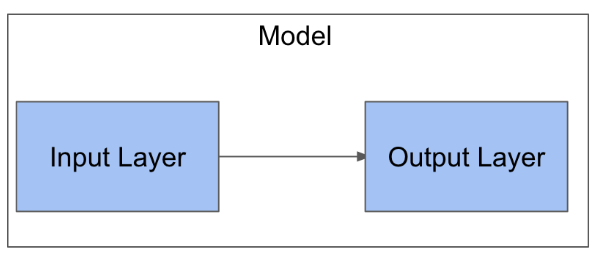

In [ ]:
from keras.models import Model
model = Model(input_tensor,output_tensor)

### 1.5 Compile a Model

The final step in creating a model is compiling it. Now that you've created a model, you have to compile it before you can fit it to data. This finalizes your model, freezes all its settings, and prepares it to meet some data!

During compilation, you specify the optimizer to use for fitting the model to the data, and a loss function. 'adam' is a good default optimizer to use, and will generally work well. Loss function depends on the problem at hand. Mean squared error is a common loss function and will optimize for predicting the mean, as is done in least squares regression.

Mean absolute error optimizes for the median and is used in quantile regression. For this dataset, 'mean_absolute_error' works pretty well, so use it as your loss function.

In [ ]:
model.compile(optimizer='adam', loss='mae')

### 1.6 Visualize a Model

Onde the model is compiled it's possible to take look a the. To do this we can look at the model summary, as well as its plot.

The summary will tell you the names of the layers, as well as how many units they have and how many parameters are in the model.

The plot will show how the layers connect to each other.

In [ ]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

## Example 1: Basketball Games

In [ ]:
games_season = pd.read_csv('datasets/Big_Dance.csv')
games_season.head()

In [ ]:
sns.heatmap(games_season, annot=True)

### Preparing data for the SISO model created above

In [ ]:
games_season['score_diff']=games_season['Score'] - games_season['Score.1']
games_season['seed_diff']=games_season['Seed'] - games_season['Seed.1']
games_season.head()


In [ ]:
games_season.hist(column="seed_diff")
games_season.hist(column="score_diff")

### Spliting Data into training and testing sets

In [ ]:
games_season_training = games_season.iloc[:2000]
games_season_testing = games_season.iloc[2000:]

In [ ]:
games_season_training.head()

In [ ]:
games_season_testing

In [ ]:
print("For Training Data:")
print("Maximum seed difference: ",games_season_training['seed_diff'].max())
print("Minimun seed difference: ",games_season_training['seed_diff'].min())
print("Maximum score difference: ",games_season_training['score_diff'].max())
print("Minimun score difference: ",games_season_training['score_diff'].min())
print("\nFor Testing Data:")
print("Maximum seed difference: ",games_season_testing['seed_diff'].max())
print("Minimun seed difference: ",games_season_testing['seed_diff'].min())
print("Maximum score difference: ",games_season_testing['score_diff'].max())
print("Minimun score difference: ",games_season_testing['score_diff'].min())

### Basketball Data

    Input: 
        * Seed difference - one number: -15 to +15
        * Seed range from 1-16
        * Highest difference is 12
        * Lowest difference is -15
    Output:
        * Score difference - one number: -43 to +58

## Fitting the Model

In [ ]:
history = model.fit(games_season_training['seed_diff'],
          games_season_training['score_diff'],
          batch_size=64,
          epochs=10,
          validation_split=0.20,
          verbose=True)

In [ ]:
print(history.history.keys())


In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Evaluate the Model

In [ ]:
model.evaluate(games_season_testing['seed_diff'],
          games_season_testing['score_diff'])

In [ ]:
prediction = model.predict(games_season_testing['seed_diff'])
#results_dataset = pd.DataFrame({'Prediction':prediction,'Real Outcome':games_season_testing['score_diff']})

In [ ]:
results_datframe = pd.DataFrame({'Prediction Results':prediction[:,0]})
#results_dataset.join(games_season_testing['score_diff'])

In [ ]:
comparison = games_season_testing.filter(['score_diff'], axis=1)
comparison = comparison.reset_index(drop=True)

In [ ]:
results_datframe = results_datframe.join(comparison, lsuffix='_caller', rsuffix='_other')

In [ ]:
results_datframe

## Example 2: Number Recognition

source: https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb

### Loading Data

This will be a simple one. MNIST dataset contains 28x28 pixel images. The network will have only two layers and one output.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [17]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


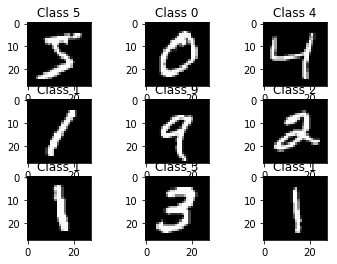

In [18]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))


### Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [19]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [20]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

### Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.

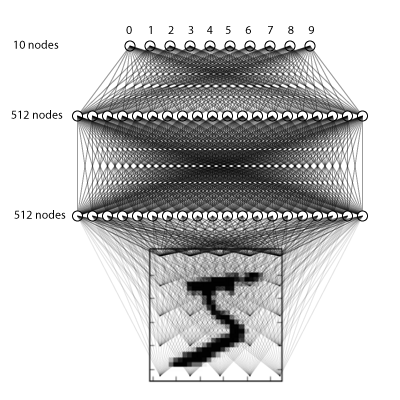

In [24]:
model2 = Sequential()
model2.add(Dense(512, input_shape=(784,)))
model2.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model2.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10))
model2.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

### Compile the model
Keras is built on top of TensorFlow (and Theano as well), both packages that allow you to define a computation graph in Python, which they then compile and run efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiling a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called categorical crossentropy, and is a loss function well-suited to comparing two probability distributions.

Here our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. More detail at Wikipedia

The optimizer helps determine how quickly the model learns, how resistent it is to getting "stuck" or "blowing up". We won't discuss this in too much detail, but "adam" is often a good choice (developed here at U of T).

In [25]:
model2.compile(loss='categorical_crossentropy', optimizer='adam')

In [31]:
from keras.utils import plot_model
# Summarize the model
model2.summary()

# Plot the model
plot_model(model2, to_file='model2.png')

# Display the image
#data = plt.imread('model2.png')
#plt.imshow(data)
#plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
__________

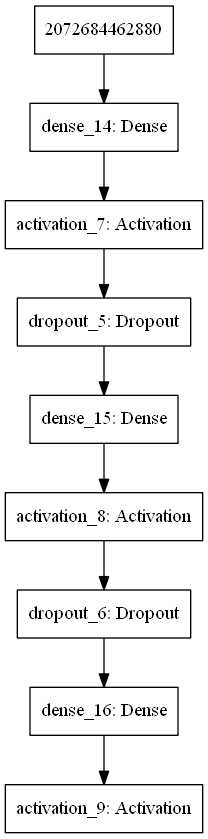

### Training the model
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [35]:
model2.fit(X_train, Y_train,
          batch_size=128, epochs=4,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 9s 153us/step - loss: 0.2522 - val_loss: 0.1076
Epoch 2/4
60000/60000 [==============================] - 9s 148us/step - loss: 0.1002 - val_loss: 0.0825
Epoch 3/4
60000/60000 [==============================] - 9s 149us/step - loss: 0.0696 - val_loss: 0.0680
Epoch 4/4
60000/60000 [==============================] - 9s 152us/step - loss: 0.0564 - val_loss: 0.0667


### Evaluating performance

In [40]:
score = model2.evaluate(X_test, Y_test, verbose = True)

10000/10000 [==============================] - 1s 64us/step


In [39]:
print(score)

0.06665409046616405


### Inspecting the output
It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [41]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model2.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

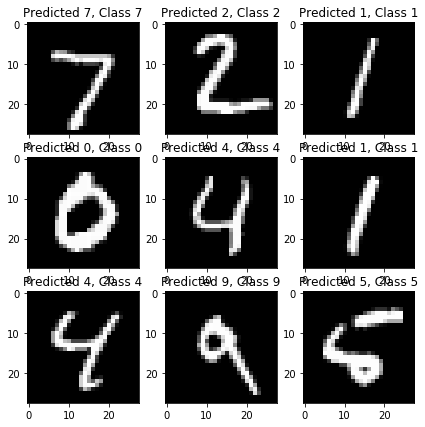

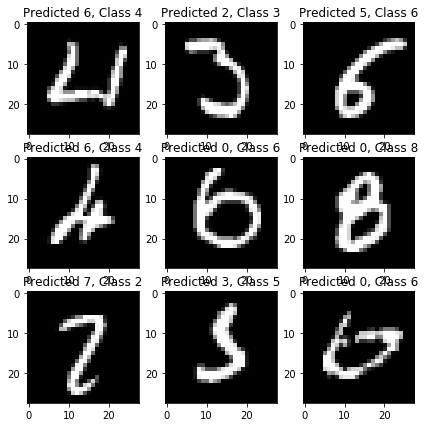

In [43]:
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))